# 01 - EUR/USD Data Collection

## Purpose
Collect historical EUR/USD data from Yahoo Finance

## Steps
1. Import libraries
2. Download data
3. Save to CSV
4. Basic validation

In [1]:
# CELL 1: Setup and imports
import os
import sys

# Add project root to Python path so we can import from src if needed
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"📁 Current directory: {os.getcwd()}")
print(f"📁 Project root: {project_root}")

# Standard library imports
import os
from datetime import datetime, timedelta

# Third-party imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("EUR/USD Data Collection")
print("✅ Libraries imported")
print(f"Today's date: {datetime.now().date()}")

📁 Current directory: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/notebooks
📁 Project root: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone
EUR/USD Data Collection
✅ Libraries imported
Today's date: 2025-12-09


In [2]:
# CELL 2: Create data directory structure
print("\n📁 Creating directory structure...")

# Define paths relative to project root
data_raw_path = os.path.join(project_root, 'data', 'raw')
data_processed_path = os.path.join(project_root, 'data', 'processed')
figures_path = os.path.join(project_root, 'figures')

# Create directories
os.makedirs(data_raw_path, exist_ok=True)
os.makedirs(data_processed_path, exist_ok=True)
os.makedirs(figures_path, exist_ok=True)

print(f"✅ Created: {data_raw_path}")
print(f"✅ Created: {data_processed_path}")
print(f"✅ Created: {figures_path}")



📁 Creating directory structure...
✅ Created: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/raw
✅ Created: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/processed
✅ Created: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/figures


In [ ]:
# CELL 3: Download EUR/USD data
print("📥 Downloading EUR/USD data from Yahoo Finance...")

ticker = "EURUSD=X"   # EUR to USD

def fetch_eurusd_data(years=3):
    """Get EUR/USD historical data"""
    print("Downloading data from Yahoo Finance...")
    
    # Define the currency pair
    ticker = "EURUSD=X"   # EUR to USD
    # Get last 3 years of daily data
    end_date = datetime.now()
    start_date = end_date - timedelta(days=years*365)

    # Download data
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)

    print(f"✅ Downloaded {len(df)} records")
    print(f"Date range: {df.index[0].date()} to {df.index[-1].date()}")
    print(f"Columns: {list(df.columns)}")

    # Keep only necessary columns
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.columns = ['open', 'high', 'low', 'close', 'volume']

    return df

# Get the data
df = fetch_eurusd_data(years=3)

📥 Downloading EUR/USD data from Yahoo Finance...
✅ Downloaded 779 records
Date range: 2022-12-12 to 2025-12-09
Columns: [('Close', 'EURUSD=X'), ('High', 'EURUSD=X'), ('Low', 'EURUSD=X'), ('Open', 'EURUSD=X'), ('Volume', 'EURUSD=X')]


In [5]:
# CELL 4: Quick peek at data
print("\n📊 First 5 rows:")
display(df.head())

print("\n📈 Last 5 rows:")
display(df.tail())

print("\n🔍 Basic statistics:")
display(df.describe())



📊 First 5 rows:


,open,high,low,close,volume
Date,,,,,
2022-12-12,1.052222,1.057921,1.050707,1.052222,0
2022-12-13,1.054174,1.066894,1.052931,1.054174,0
2022-12-14,1.062665,1.066985,1.062011,1.062665,0
2022-12-15,1.067635,1.072559,1.060738,1.067635,0
2022-12-16,1.064056,1.066325,1.059940,1.064056,0



📈 Last 5 rows:


,open,high,low,close,volume
Date,,,,,
2025-12-03,1.162899,1.167583,1.162818,1.162791,0
2025-12-04,1.166671,1.168224,1.165365,1.166684,0
2025-12-05,1.164456,1.167147,1.162858,1.164280,0
2025-12-08,1.164117,1.167256,1.161697,1.164022,0
2025-12-09,1.163873,1.165909,1.163738,1.164144,0



🔍 Basic statistics:


,open,high,low,close,volume
count,779.000000,779.000000,779.000000,779.000000,779.0
mean,1.095747,1.099036,1.092508,1.095745,0.0
std,0.037639,0.037593,0.037629,0.037636,0.0
min,1.024443,1.025021,1.018382,1.024443,0.0
25%,1.072035,1.074588,1.068262,1.072035,0.0
50%,1.087276,1.090156,1.083929,1.087276,0.0
75%,1.111327,1.114659,1.107450,1.111327,0.0
max,1.187141,1.187296,1.183432,1.187141,0.0


In [ ]:
# CELL 5: Rename columns and save raw data
print("\n💾 Saving raw data...")

# Rename columns for clarity
# df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Save to CSV
raw_data_path = os.path.join(data_raw_path, 'eurusd_raw.csv')
df.to_csv(raw_data_path)
print(f"✅ Raw data saved to: {raw_data_path}")


💾 Saving raw data...
✅ Raw data saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/raw/eurusd_raw.csv


In [7]:
# CELL 6: Check for missing values
print("\n🔎 Missing values check:")
missing = df.isnull().sum()
if missing.any():
    print("Missing values found:")
    for col, count in missing[missing > 0].items():
        print(f"  {col}: {count} missing")
else:
    print("✅ No missing values")


🔎 Missing values check:
✅ No missing values


In [ ]:
# CELL 8: Basic validation
print("\n" + "=" * 60)
print("DATA VALIDATION")
print("=" * 60)
print(f"\n📊 Dataset Overview:")
print(f"   Total records: {len(df)}")
print(f"   Date range: {(df.index[-1] - df.index[0]).days} days")
print(f"\n🔍 Missing Values:")
print(df.isnull().sum())
print(f"\n📈 Price Statistics:")
print(df[['open', 'high', 'low', 'close']].describe())
print(f"\n💹 Volume Statistics:")
print(df['volume'].describe())


DATA VALIDATION

📊 Dataset Overview:
   Total records: 779
   Date range: 1093 days

🔍 Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

📈 Price Statistics:
             open        high         low       close
count  779.000000  779.000000  779.000000  779.000000
mean     1.095747    1.099036    1.092508    1.095745
std      0.037639    0.037593    0.037629    0.037636
min      1.024443    1.025021    1.018382    1.024443
25%      1.072035    1.074588    1.068262    1.072035
50%      1.087276    1.090156    1.083929    1.087276
75%      1.111327    1.114659    1.107450    1.111327
max      1.187141    1.187296    1.183432    1.187141

💹 Volume Statistics:
count    779.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: volume, dtype: float64



📈 Creating visualization...


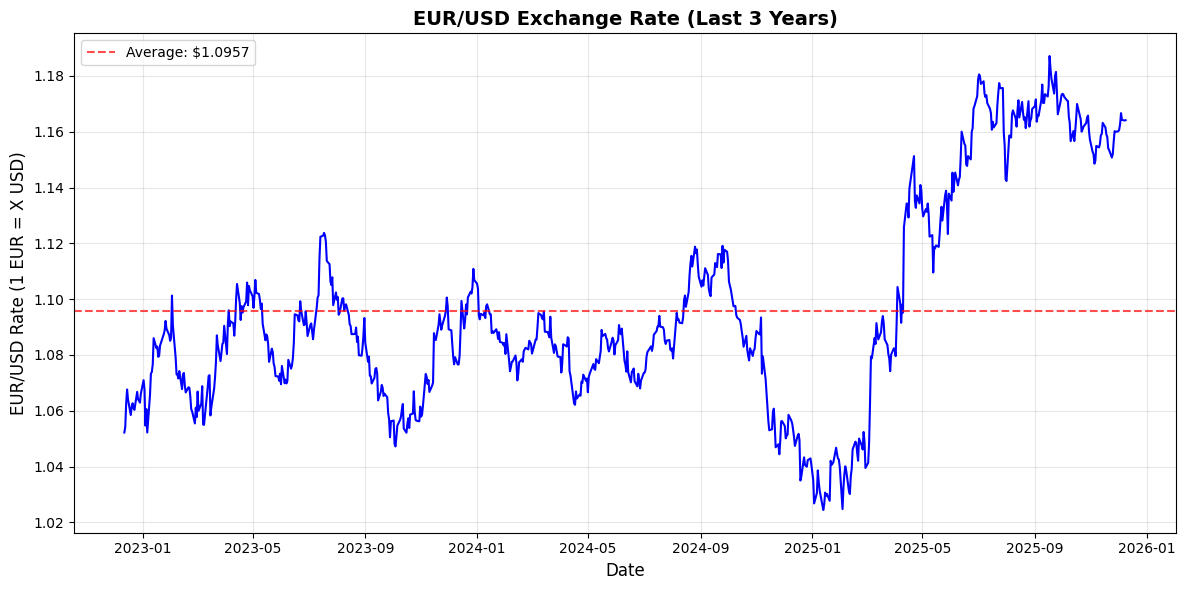

✅ Chart saved as: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/figures/eurusd_timeseries.png


In [10]:
# CELL 9: Create basic visualization
print("\n📈 Creating visualization...")

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], color='blue', linewidth=1.5)
plt.title('EUR/USD Exchange Rate (Last 3 Years)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('EUR/USD Rate (1 EUR = X USD)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add average line
avg_price = df['close'].mean()
plt.axhline(y=avg_price, color='red', linestyle='--', alpha=0.7, 
           label=f'Average: ${avg_price:.4f}')
plt.legend()

plt.tight_layout()

# Save the plot
chart_path = os.path.join(figures_path, 'eurusd_timeseries.png')
plt.savefig(chart_path, dpi=100, bbox_inches='tight')
plt.show()

print(f"✅ Chart saved as: {chart_path}")

In [13]:
# CELL 10: Save metadata
print("\n📋 Saving metadata...")

metadata = {
    'ticker': 'EURUSD=X',
    'data_points': len(df),
    'date_range': {
        'start': df.index[0].date().isoformat(),
        'end': df.index[-1].date().isoformat()
    },
    'columns': list(df.columns),
    'download_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'statistics': {
        'average_close': float(df['close'].mean()),
        'min_close': float(df['close'].min()),
        'max_close': float(df['close'].max()),
        'std_close': float(df['close'].std())
    }
}

metadata_path = os.path.join(data_raw_path, 'metadata.json')
import json
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"✅ Metadata saved to: {metadata_path}")


📋 Saving metadata...
✅ Metadata saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/raw/metadata.json
